# **Mecánica de Fluidos: Tarea 01**
---
## *Subcoordinación de Posgrado y Educación Continua.*
### [Instituto Mexicano de Tecnología del Agua](https://www.gob.mx/imta).<br>

<img src="Imagenes/imta_logo.png" style="height: 5em; vertical-align: middle;">
<img src="Imagenes/Mexico.jpg" style="height: 5em; vertical-align: middle;">

**Alumno: Ing. Omar Ulises Robles Pereyra** <br>
**Docente: Dr. Ariosto Aguilar Chávez** <br>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OmarURP/Tratamiento_Datos/blob/master/Clase_01.ipynb)

---

#### **Instrucciones:**
En esta tarea, completará una serie de ejercicios que se describen en el documento adjunto. Estos ejercicios están diseñados para ayudarte a practicar y reforzar los conceptos clave que hemos estado aprendiendo en clase. Es importante abordar cada ejercicio de manera cuidadosa y exhaustiva para obtener el mayor beneficio de esta tarea.

##### **1.1. Determine el factor de conversión de:**  Velocidad: $km/h \to m/s$, Gasto: $cfs \to m^3/s$

##### **1.2. Determine si la ecuación siguiente es dimensionalmente homogénea:**
$$V=\frac{1}{n} R^\frac {2}{3} S^\frac{1}{2}$$
Donde: $V$ es la velocidad media en $m \cdot s^{-1} $,  $R$ radio hidráulico en $m$, $S$ pendiente del fondo del canal [adimensional], $n$ Coeficiente de rugosidad de Manning [unidades por determinar]<br>

*¿Qué elementos se necesitan para que la ecuación anterior sea dimensionalmente homogénea?*

##### **1.3. Determinar las dimensiones del cálculo de potencia de una bomba**
El sistema tiene un gasto instantáneo de $Q = 0.025 m^3 \cdot h{-1}$, con una carga de $H = 15.26m$, y el fluido es agua a una temperatura de $T = 19°C$ y tiene una densidad de $\rho = 999.10 kg \cdot m^{-3}$.

#### **1.4 En un experimento en el laboratorio con un tubo Pitot se han obtenido los datos de diferencias de presión siguientes:**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import KroghInterpolator

In [9]:
# 1. Extraer los datos de la imagen y almacenarlos en un DataFrame de pandas.
# Los puntos (x, s) son: (0, 0), (0.05, 0.005), (0.10, 0.008), (0.20, 0.01)
# La derivada en el último punto es ds/dx = 0 en x = 0.20.

datos = {
    'x': [0.0, 0.05, 0.10, 0.20],
    's': [0.0, 0.005, 0.008, 0.01]
}
points_df = pd.DataFrame(datos)

print("Puntos de la curva a proyectar:")
print(points_df)

Puntos de la curva a proyectar:
      x      s
0  0.00  0.000
1  0.05  0.005
2  0.10  0.008
3  0.20  0.010


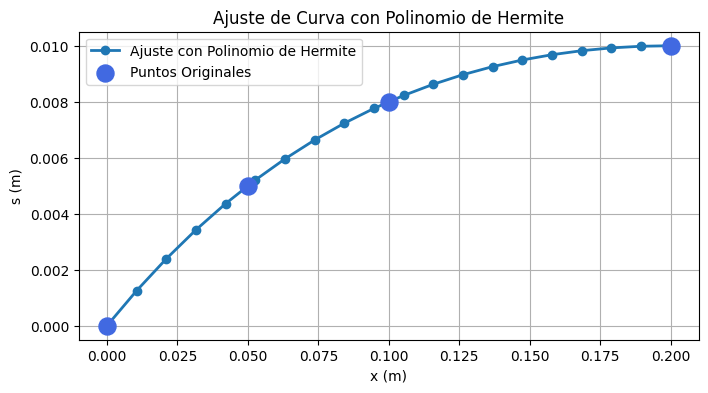

In [12]:
# 2. Preparar los datos para la interpolación de Hermite.
# Para incluir la derivada, repetimos el punto 'x' donde la derivada es conocida
# y en el vector 's' correspondiente, ponemos el valor de la función y luego el de la derivada.
# Formato: x_interp = [x0, x1, x2, x3, x3], s_interp = [s(x0), s(x1), s(x2), s(x3), s'(x3)]

x_interp = list(points_df['x']) + [points_df['x'].iloc[-1]]
s_interp = list(points_df['s']) + [0.00]  # El último valor es la derivada ds/dx=0

x_interp = np.array(x_interp)
s_interp = np.array(s_interp)

# 3. Crear el polinomio interpolador de Hermite.
# KroghInterpolator de SciPy puede manejar estas condiciones.
hermite_poly = KroghInterpolator(x_interp, s_interp)

# 4. Generar una serie de puntos 'x' para dibujar la curva suave.
x_nueva = np.linspace(0, 0.20, 20)

# 5. Calcular los valores 's' correspondientes usando el polinomio ajustado.
s_nueva = hermite_poly(x_nueva)

# 6. Visualizar los resultados con Matplotlib.
fig, ax = plt.subplots(figsize=(8, 4))

# Dibujar la curva ajustada
ax.plot(x_nueva, s_nueva,'o-', label='Ajuste con Polinomio de Hermite', linewidth=2)

# Dibujar los puntos originales
ax.scatter(points_df['x'], points_df['s'], color='royalblue', s=150, zorder=5, label='Puntos Originales')

# Configuración de la gráfica
ax.set_title('Ajuste de Curva con Polinomio de Hermite')
ax.set_xlabel('x (m)')
ax.set_ylabel('s (m)')
ax.legend()
ax.grid(True)

plt.show()

In [16]:
# Exportando la curva ajustada a un archivo .csv
curva_creada = pd.DataFrame({'x': x_nueva, 's': s_nueva})
curva_creada.to_csv('Curva_entrada.csv', index=False, header=False)